# Intro to convolutional networks and comp[uter vision with tensorflow]

# Get data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2025-01-10 20:58:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.111.207, 142.251.16.207, 172.253.62.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.111.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  69.6MB/s    in 1.5s    

2025-01-10 20:58:04 (69.6 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
# get the classnames programatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  return img

['1065078.jpg']
Image shape: (512, 384, 3)


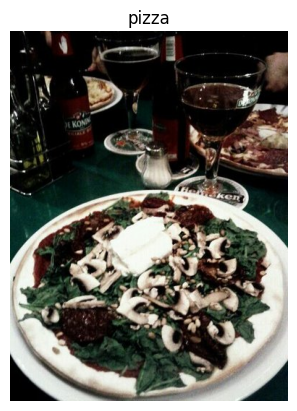

In [4]:
img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza");

In [5]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 3, 22, 28],
        [ 3, 22, 28],
        [ 7, 26, 32]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 6, 25, 31],
        [ 6, 25, 32],
        [10, 29, 36]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 8, 27, 33],
        [ 9, 28, 35],
        [13, 32, 39]]], dtype=uint8)>

## end to end example

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42,
)
valid_data = valid_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42,
)

# model_1 = tf.keras.models.Sequential([
#   tf.keras.layers.Conv2D(filters=10,
#                          kernel_size=3,
#                          activation="relu",
#                          input_shape=(224, 224, 3)),
#   tf.keras.layers.Conv2D(filters=10,
#                          kernel_size=3,
#                          activation="relu"),
#   tf.keras.layers.MaxPool2D(pool_size=2,
#                             padding="valid"),
#   tf.keras.layers.Conv2D(filters=10,
#                          kernel_size=3,
#                          activation="relu"),
#   tf.keras.layers.Conv2D(filters=10,
#                          kernel_size=3,
#                          activation="relu"),
#   tf.keras.layers.MaxPool2D(pool_size=2,
#                             padding="valid"),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(1, activation="sigmoid")
# ])

# model_1.compile(loss="binary_crossentropy",
#               optimizer=tf.keras.optimizers.Adam(),
#               metrics=["accuracy"])

# history_1 = model_1.fit(train_data,
#                         epochs=5,
#                         steps_per_epoch=len(train_data),
#                         validation_data=valid_data,
#                         validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [7]:
# tf.random.set_seed(42)

# model_2 = tf.keras.Sequential([
#   tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
#   tf.keras.layers.Dense(4, activation="relu"),
#   tf.keras.layers.Dense(4, activation="relu"),
#   tf.keras.layers.Dense(1, activation="sigmoid")
#   ])

# model_2.compile(loss="binary_crossentropy",
#               optimizer=tf.keras.optimizers.Adam(),
#               metrics=["accuracy"])

# history_2 = model_2.fit(train_data,
#                         epochs=5,
#                         steps_per_epoch=len(train_data),
#                         validation_data=valid_data,
#                         validation_steps=len(valid_data))

In [8]:
# tf.random.set_seed(42)

# model_3 = tf.keras.Sequential([
#   tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
#   tf.keras.layers.Dense(100, activation="relu"),
#   tf.keras.layers.Dense(100, activation="relu"),
#   tf.keras.layers.Dense(100, activation="relu"),
#   tf.keras.layers.Dense(1, activation="sigmoid")
#   ])

# model_3.compile(loss="binary_crossentropy",
#               optimizer=tf.keras.optimizers.Adam(),
#               metrics=["accuracy"])

# history_3 = model_3.fit(train_data,
#                         epochs=5,
#                         steps_per_epoch=len(train_data),
#                         validation_data=valid_data,
#                         validation_steps=len(valid_data))

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42,
)
valid_data = valid_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42,
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [10]:
images, labels = next(train_data) # Use next(train_data) to get the next batch
len(images), len(labels)

(32, 32)

In [11]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential

In [12]:
# model_4 = tf.keras.Sequential([
#   tf.keras.layers.Conv2D(
#       filters=10,
#       kernel_size=3,
#       strides=1,
#       padding="valid",
#       activation="relu",
#       input_shape=(224, 224, 3)
#   ),
#   tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
#   tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(1, activation="sigmoid")
# ])

# model_4.compile(loss="binary_crossentropy",
#               optimizer=tf.keras.optimizers.Adam(),
#               metrics=["accuracy"])

# history_4 = model_4.fit(train_data,
#                         epochs=5,
#                         steps_per_epoch=len(train_data),
#                         validation_data=valid_data,
#                         validation_steps=len(valid_data))

### Evaluate model

In [13]:
import pandas as pd
# pd.DataFrame(history_4.history).plot(figsize=(10, 7));

### reduce overfitting

In [14]:
# model_5 = tf.keras.Sequential([
#   tf.keras.layers.Conv2D(
#       filters=10,
#       kernel_size=3,
#       strides=1,
#       padding="valid",
#       activation="relu",
#       input_shape=(224, 224, 3)
#   ),
#   tf.keras.layers.MaxPool2D(pool_size=2),
#   tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(1, activation="sigmoid")
# ])

# model_5.compile(loss="binary_crossentropy",
#               optimizer=tf.keras.optimizers.Adam(),
#               metrics=["accuracy"])

# history_5 = model_5.fit(train_data,
#                         epochs=5,
#                         steps_per_epoch=len(train_data),
#                         validation_data=valid_data,
#                         validation_steps=len(valid_data))

### data augmentation

In [15]:
# Create ImageDataGenerator training instance with data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                         rotation_range=0.2,
                                         shear_range=0.2,
                                         zoom_range=0.2,
                                         width_shift_range=0.2,
                                         height_shift_range=0.2,
                                         horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [16]:
# import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=False,
    # seed=42
)

# Create non-augmented train data batches
print("Non-augmented training data")
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=False,
)

# Create non-augmented test data batches
print("Non-augmented test data")
valid_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
)


Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


In [17]:
# Get sample data batches
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmented)

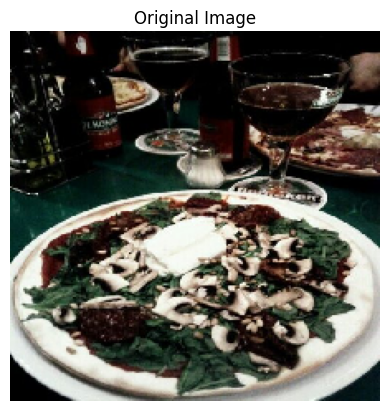

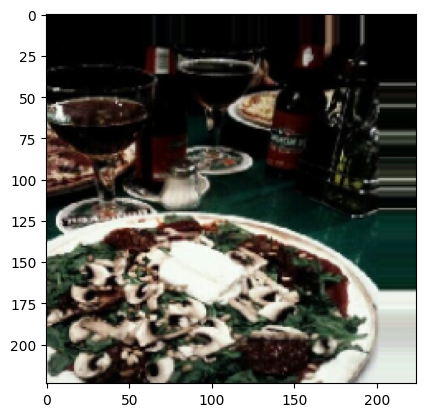

In [18]:
# Show original image and augmented image
random_number = random.randint(0, 31)
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis("off")

plt.figure()
plt.imshow(augmented_images[random_number])

In [19]:
# Create a model with augmented data
# model_6 = tf.keras.Sequential([
#   tf.keras.layers.Conv2D(
#       filters=10,
#       kernel_size=3,
#       strides=1,
#       padding="valid",
#       activation="relu",
#       input_shape=(224, 224, 3)
#   ),
#   tf.keras.layers.MaxPool2D(pool_size=2),
#   tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(1, activation="sigmoid")
# ])

# model_6.compile(loss="binary_crossentropy",
#               optimizer=tf.keras.optimizers.Adam(),
#               metrics=["accuracy"])

# history_6 = model_6.fit(train_data_augmented,
#                         epochs=5,
#                         steps_per_epoch=len(train_data_augmented),
#                         validation_data=valid_data,
#                         validation_steps=len(valid_data))

### shuffle training data

In [20]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=True,
    # seed=42
)


Found 1500 images belonging to 2 classes.


In [21]:
# Create a model with augmented data shuffled
# model_7 = tf.keras.Sequential([
#   tf.keras.layers.Conv2D(
#       filters=10,
#       kernel_size=3,
#       strides=1,
#       padding="valid",
#       activation="relu",
#       input_shape=(224, 224, 3)
#   ),
#   tf.keras.layers.MaxPool2D(pool_size=2),
#   tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(1, activation="sigmoid")
# ])

# model_7.compile(loss="binary_crossentropy",
#               optimizer=tf.keras.optimizers.Adam(),
#               metrics=["accuracy"])

# history_7 = model_7.fit(train_data_augmented_shuffled,
#                         epochs=5,
#                         steps_per_epoch=len(train_data_augmented_shuffled),
#                         validation_data=valid_data,
#                         validation_steps=len(valid_data))

In [22]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# !wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg?raw=true
steak = mpimg.imread("/content/03-steak.jpeg")
plt.imshow(steak)

FileNotFoundError: [Errno 2] No such file or directory: '/content/03-steak.jpeg'

In [23]:
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  img = img/255.
  return img

In [24]:
steak = load_and_prep_image("/content/03-steak.jpeg")
steak.shape

NotFoundError: {{function_node __wrapped__ReadFile_device_/job:localhost/replica:0/task:0/device:CPU:0}} /content/03-steak.jpeg; No such file or directory [Op:ReadFile]

In [ ]:
model_7.predict(tf.expand_dims(steak, axis=0))

In [25]:
def pred_and_plot(model, filename, class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred))]
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

In [26]:
pred_and_plot(model=model_7,
              filename="/content/03-steak.jpeg",
              class_names=class_names)

NameError: name 'model_7' is not defined

In [27]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2025-01-10 20:59:25--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.179.207, 64.233.180.207, 172.253.115.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.179.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   190MB/s    in 2.6s    

2025-01-10 20:59:28 (190 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [28]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 

In [29]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [30]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['2114471.jpg']
Image shape: (511, 512, 3)


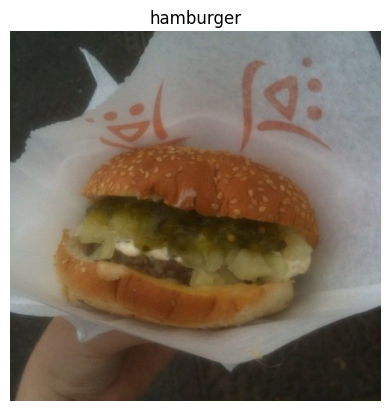

In [31]:
import random
# def view_random_image(target_dir, target_class):
#   target_folder = target_dir + target_class
#   random_image = random.sample(os.listdir(target_folder), 1)
#   print(random_image)

img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names))

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")



Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [38]:
model_8 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(
      filters=10,
      kernel_size=3,
      strides=1,
      padding="valid",
      activation="relu",
      input_shape=(224, 224, 3)
  ),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_8.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# history_8 = model_8.fit(train_data,
#                         epochs=5,
#                         steps_per_epoch=len(train_data),
#                         validation_data=test_data,
#                         validation_steps=len(test_data))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model_8.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 33s 404ms/step - accuracy: 0.3213 - loss: 1.9041


[1.8981468677520752, 0.32600000500679016]

In [35]:
model_9 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(
      filters=10,
      kernel_size=3,
      strides=1,
      padding="valid",
      activation="relu",
      input_shape=(224, 224, 3)
  ),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_9.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.2027 - loss: 2.2990 - val_accuracy: 0.2972 - val_loss: 1.9342
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 177us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


235/235 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.4002 - loss: 1.7526 - val_accuracy: 0.3592 - val_loss: 1.8288
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 70us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.5437 - loss: 1.4096 - val_accuracy: 0.3236 - val_loss: 1.9533


In [37]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             height_shift_range=0.2,
                                             width_shift_range=0.2,
                                             horizontal_flip=True,
                                             zoom_range=0.2)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [39]:
model_10 = tf.keras.models.clone_model(model_8)

model_10.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_10 = model_10.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 347s 1s/step - accuracy: 0.1493 - loss: 2.2440 - val_accuracy: 0.2220 - val_loss: 2.1456
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


235/235 ━━━━━━━━━━━━━━━━━━━━ 342s 1s/step - accuracy: 0.2196 - loss: 2.1459 - val_accuracy: 0.2904 - val_loss: 1.9836
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 73us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 381s 1s/step - accuracy: 0.2637 - loss: 2.0619 - val_accuracy: 0.2812 - val_loss: 1.9986


In [40]:
model_10.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 32s 404ms/step - accuracy: 0.2924 - loss: 1.9902


[1.9985681772232056, 0.28119999170303345]

In [42]:
model_10.save("model_10.keras")

In [43]:
loaded_model = tf.keras.models.load_model("model_10.keras")

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [44]:
loaded_model.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 34s 417ms/step - accuracy: 0.2820 - loss: 2.0023


[1.9985679388046265, 0.28119999170303345]